# Importing Libraries


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE


#import plotly.graph_objs as go
#import plotly.express as px
#import warnings
#warnings.simplefilter("ignore")

# Loading up the data 

In [254]:
data = pd.read_csv("C:/Users/Mali/Downloads/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [256]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [257]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# we see that the Lung cancer  and Gender column types are object so we want to change them to numeric type:

In [258]:
data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [259]:
data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [260]:
# Mapping numeric values to non-numeric values

data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})

data["LUNG_CANCER"] = data["LUNG_CANCER"].map({'NO': 0, 'YES': 1})

In [261]:
data['LUNG_CANCER']=data['LUNG_CANCER'].astype(int)

In [262]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int32
dtype: object

In [263]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


# Splitting the Data

In [264]:
# X data 
X = data.drop("LUNG_CANCER", axis = 1)

In [265]:
# y data 
y = data["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int32

In [266]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size = 0.2, random_state = 12)

In [267]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1


In [268]:
len(x_test), len(x_train)

(62, 247)

# lets look if the data is balanced

In [269]:
train_set=pd.concat((x_train,y_train),axis=1)
train_set


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2,1
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2,1
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1,0
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2,1
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1,1


LUNG_CANCER
0     32
1    215
Name: LUNG_CANCER, dtype: int64


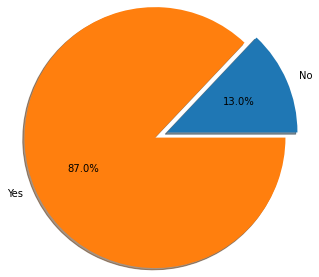

In [270]:
r = train_set.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
print(r)
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

# As we can see only 13% of the data has no lung cancer disease, so we need to increase the data. For this purpose we will use SMOTE technique later.

# lets look at the numeric attribute-age:

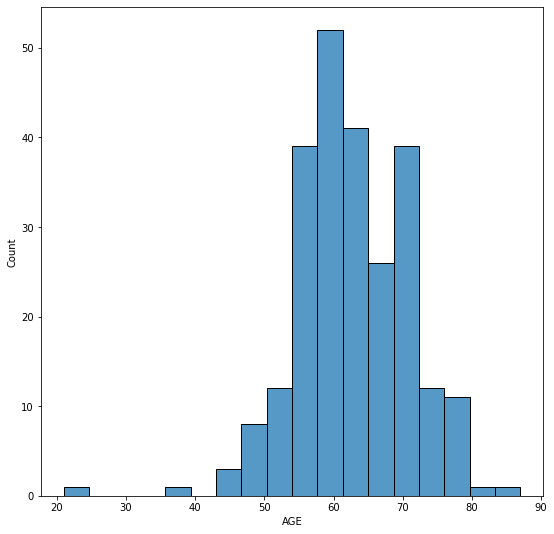

In [271]:
plt.figure(figsize=(9,9))
sns.histplot(train_set[['AGE']], x = "AGE")
plt.title("")
plt.show()

# we can see that the distribution of the ages is not equal. there are barely any young people.
# we are going to do something with that because we don't have another data. but its important to recognize it.



# lets look at the categorial attributes:

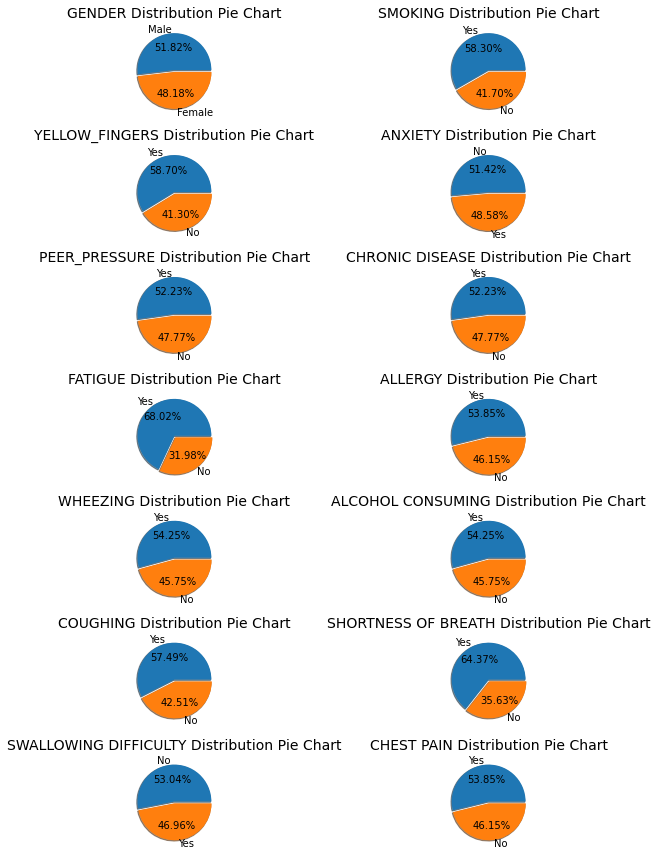

In [272]:
fig, ax = plt.subplots(7,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = ax

labels = ["Male", "Female"]
values = train_set['GENDER'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax1.set_title("GENDER Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['SMOKING'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax2.set_title("SMOKING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['YELLOW_FINGERS'].value_counts().tolist()[:2]
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax3.set_title("YELLOW_FINGERS Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["No", "Yes"]
values = train_set['ANXIETY'].value_counts().tolist()[:2]
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax4.set_title("ANXIETY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['PEER_PRESSURE'].value_counts().tolist()[:2]
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax5.set_title("PEER_PRESSURE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['CHRONIC DISEASE'].value_counts().tolist()[:2]
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax6.set_title("CHRONIC DISEASE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['FATIGUE '].value_counts().tolist()[:2]
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax7.set_title("FATIGUE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['ALLERGY '].value_counts().tolist()[:2]
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax8.set_title("ALLERGY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['WHEEZING'].value_counts().tolist()[:2]
ax9.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax9.set_title("WHEEZING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['ALCOHOL CONSUMING'].value_counts().tolist()[:2]
ax10.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax10.set_title("ALCOHOL CONSUMING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['COUGHING'].value_counts().tolist()[:2]
ax11.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax11.set_title("COUGHING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['SHORTNESS OF BREATH'].value_counts().tolist()[:2]
ax12.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax12.set_title("SHORTNESS OF BREATH Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["No", "Yes"]
values = train_set['SWALLOWING DIFFICULTY'].value_counts().tolist()[:2]
ax13.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax13.set_title("SWALLOWING DIFFICULTY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['CHEST PAIN'].value_counts().tolist()[:2]
ax14.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax14.set_title("CHEST PAIN Distribution Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# Corolation

 # **we predict that there is a correlation between age and smoking to having lung cancer. lets see if it's true.**
   

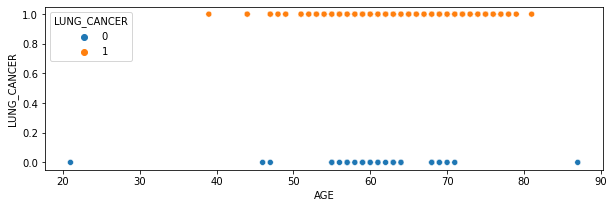

In [273]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=train_set[['AGE', 'LUNG_CANCER']], x="AGE", y="LUNG_CANCER", hue="LUNG_CANCER")
plt.title("")
plt.show()

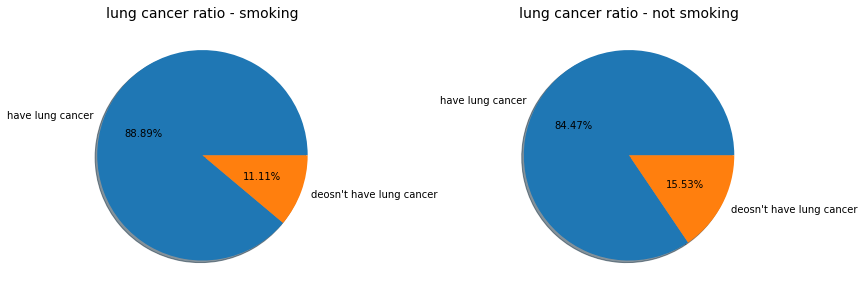

In [274]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SMOKING']==2]['LUNG_CANCER'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("lung cancer ratio - smoking", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SMOKING']==1]['LUNG_CANCER'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("lung cancer ratio - not smoking", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# **from this plot we can see that there isn't a clear correlation between age and smoking to having lung cancer.**

<AxesSubplot:>

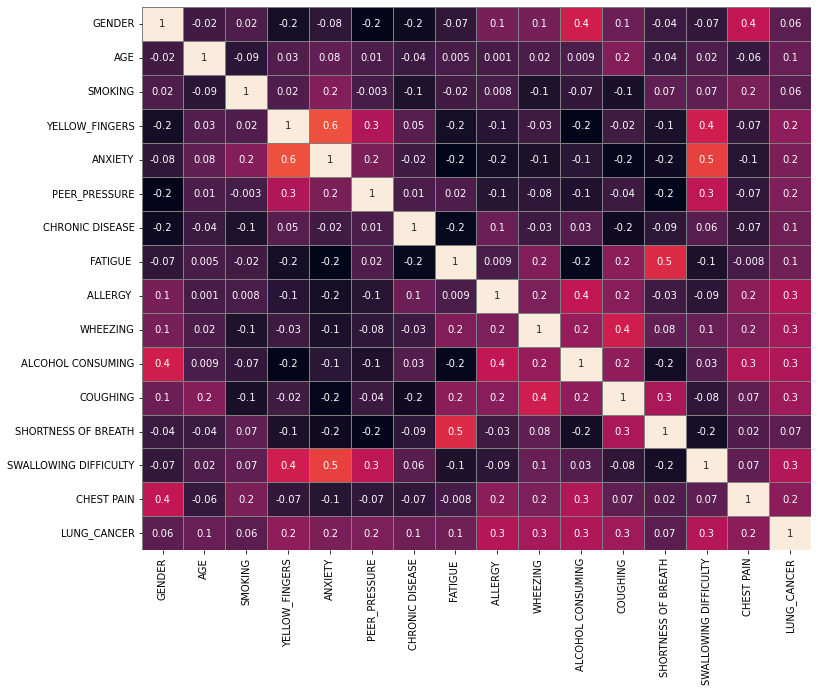

In [275]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(train_set.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

In [276]:
corr_matrix = train_set.corr()
corr_matrix["LUNG_CANCER"].sort_values(ascending = False)

LUNG_CANCER              1.000000
ALLERGY                  0.319970
SWALLOWING DIFFICULTY    0.314722
ALCOHOL CONSUMING        0.299117
WHEEZING                 0.274917
COUGHING                 0.253549
YELLOW_FINGERS           0.215120
CHEST PAIN               0.199051
PEER_PRESSURE            0.162015
ANXIETY                  0.155669
FATIGUE                  0.123173
CHRONIC DISEASE          0.113743
AGE                      0.099744
SHORTNESS OF BREATH      0.065434
SMOKING                  0.064940
GENDER                   0.062323
Name: LUNG_CANCER, dtype: float64

# attributes which have main correlations with Lung cancer (>0.25):

# *Allergy

# *Alcohol consuming

# *swallowing difficulty

# *Wheezing

# *Coughing

<AxesSubplot:>

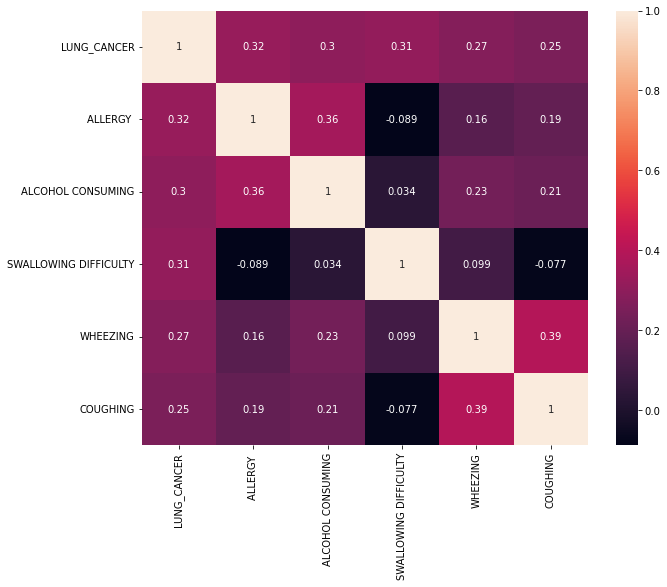

In [277]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_set[['LUNG_CANCER', 'ALLERGY ', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY','WHEEZING','COUGHING']].corr(),annot=True)

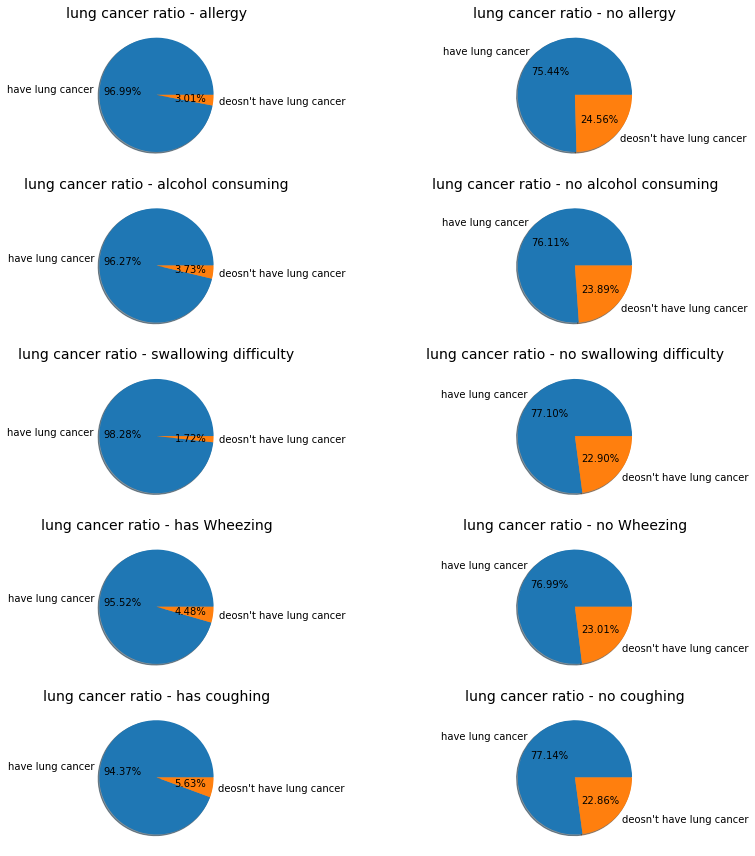

In [278]:
fig, ax = plt.subplots(5,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7, ax8), (ax9,ax10)) = ax

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALLERGY ']==2]['LUNG_CANCER'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("lung cancer ratio - allergy", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALLERGY ']==1]['LUNG_CANCER'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("lung cancer ratio - no allergy", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALCOHOL CONSUMING']==2]['LUNG_CANCER'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("lung cancer ratio - alcohol consuming", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALCOHOL CONSUMING']==1]['LUNG_CANCER'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("lung cancer ratio - no alcohol consuming", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SWALLOWING DIFFICULTY']==2]['LUNG_CANCER'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax5.set_title("lung cancer ratio - swallowing difficulty", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SWALLOWING DIFFICULTY']==1]['LUNG_CANCER'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax6.set_title("lung cancer ratio - no swallowing difficulty", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['WHEEZING']==2]['LUNG_CANCER'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax7.set_title("lung cancer ratio - has Wheezing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['WHEEZING']==1]['LUNG_CANCER'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax8.set_title("lung cancer ratio - no Wheezing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['COUGHING']==2]['LUNG_CANCER'].value_counts().tolist()
ax9.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax9.set_title("lung cancer ratio - has coughing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['COUGHING']==1]['LUNG_CANCER'].value_counts().tolist()
ax10.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax10.set_title("lung cancer ratio - no coughing", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [279]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1


In [280]:
#copy for backup
x_train_copy = x_train.copy()

x_train = pd.get_dummies(x_train, columns=['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
x_train.rename(columns={'AGE':'Age', 'LUNG_CANCER':'Lung cancer', 'GENDER_0':'Female', 'GENDER_1':'Male', 'SMOKING_1':'Not smoking', 'SMOKING_2':'Smoking',
       'YELLOW_FINGERS_1':'No yello fingers', 'YELLOW_FINGERS_2':'Has yello fingers', 'ANXIETY_1':'No anxiety', 'ANXIETY_2':'Has anxiety',
       'PEER_PRESSURE_1':'No peer preessure', 'PEER_PRESSURE_2':'peer preessure', 'CHRONIC DISEASE_1':'No chronic disease',
       'CHRONIC DISEASE_2':'No chronic disease', 'FATIGUE _1':'No fatigue', 'FATIGUE _2':'Has fatigue', 'ALLERGY _1':'No allergy',
       'ALLERGY _2':'Has allergy', 'WHEEZING_1':'No wheezing', 'WHEEZING_2':'Has wheezing', 'ALCOHOL CONSUMING_1':'doesnt consume alchohol',
       'ALCOHOL CONSUMING_2':'Consume alchohol', 'COUGHING_1':'No coughing', 'COUGHING_2':'Has a cough',
       'SHORTNESS OF BREATH_1':'No shortness of breath', 'SHORTNESS OF BREATH_2':'Has shortness of breath',
       'SWALLOWING DIFFICULTY_1':"No swallowing difficulty", 'SWALLOWING DIFFICULTY_2':'Has swallowing difficulty', 'CHEST PAIN_1':'No chest pain',
       'CHEST PAIN_2':'Has chest pain'}, inplace=True)
x_train

,Age,Female,Male,Not smoking,Smoking,No yello fingers,Has yello fingers,No anxiety,Has anxiety,No peer preessure,...,doesnt consume alchohol,Consume alchohol,No coughing,Has a cough,No shortness of breath,Has shortness of breath,No swallowing difficulty,Has swallowing difficulty,No chest pain,Has chest pain
52,54,1,0,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,1,0,1
267,60,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,1
61,60,1,0,1,0,0,1,0,1,1,...,1,0,0,1,1,0,1,0,1,0
106,61,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
251,64,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,58,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
130,51,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
241,59,0,1,0,1,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
253,67,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0


# we need to do the same for the test set 

In [281]:
#copy for backup
x_test_copy = x_test.copy()

x_test = pd.get_dummies(x_test, columns=['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
x_test.rename(columns={'AGE':'Age', 'LUNG_CANCER':'Lung cancer', 'GENDER_0':'Female', 'GENDER_1':'Male', 'SMOKING_1':'Not smoking', 'SMOKING_2':'Smoking',
       'YELLOW_FINGERS_1':'No yello fingers', 'YELLOW_FINGERS_2':'Has yello fingers', 'ANXIETY_1':'No anxiety', 'ANXIETY_2':'Has anxiety',
       'PEER_PRESSURE_1':'No peer preessure', 'PEER_PRESSURE_2':'peer preessure', 'CHRONIC DISEASE_1':'No chronic disease',
       'CHRONIC DISEASE_2':'No chronic disease', 'FATIGUE _1':'No fatigue', 'FATIGUE _2':'Has fatigue', 'ALLERGY _1':'No allergy',
       'ALLERGY _2':'Has allergy', 'WHEEZING_1':'No wheezing', 'WHEEZING_2':'Has wheezing', 'ALCOHOL CONSUMING_1':'doesnt consume alchohol',
       'ALCOHOL CONSUMING_2':'Consume alchohol', 'COUGHING_1':'No coughing', 'COUGHING_2':'Has a cough',
       'SHORTNESS OF BREATH_1':'No shortness of breath', 'SHORTNESS OF BREATH_2':'Has shortness of breath',
       'SWALLOWING DIFFICULTY_1':"No swallowing difficulty", 'SWALLOWING DIFFICULTY_2':'Has swallowing difficulty', 'CHEST PAIN_1':'No chest pain',
       'CHEST PAIN_2':'Has chest pain'}, inplace=True)

# **matrix confusion**!!!!!!!!!!!!!!!!!!!!!!!

# scaling the data using MinMaxScaler


In [282]:
scaler = MinMaxScaler()
x_train[['Age']] = scaler.fit_transform(x_train[['Age']])
x_test[['Age']] = scaler.fit_transform(x_test[['Age']])

In [283]:
x_train['Age']

52     0.500000
267    0.590909
61     0.590909
106    0.606061
251    0.651515
         ...   
259    0.560606
130    0.454545
241    0.575758
253    0.696970
155    0.818182
Name: Age, Length: 247, dtype: float64

# Now our data is scaled and we are good to continue! :)

In [284]:
scaled_train_set = pd.concat([x_train,y_train],axis=1)


# SMOTE explaination

In [287]:
sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train.to_numpy(), y_train)

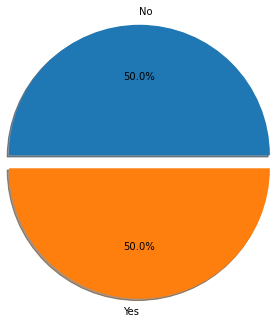

In [288]:
r = y_res.value_counts()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

# lets look for prediction model!

# K-NN model

In [297]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
clf_rmse_scores = np.sqrt(-scores)
print(-scores)
#print(clf_rmse_scores)


[0.12  0.12  0.12  0.12  0.12  0.16  0.16  0.125 0.125 0.125]


In [ ]:
#random forest classifier with five-fold cross validation
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))